In [163]:
import datetime
import json
import boto3
import io
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
#import seaborn as sns
plt.style.use('ggplot')

In [164]:
pickle_file = '../btc-autotrader/lib/data/log/2019-03-11T14:54:40.450436.pickle'

In [165]:
df = pd.read_pickle(pickle_file)

In [166]:
df['spread'] = df.ask_low - df.bid_high

In [167]:
df['spread_pct_change'] = df.spread.pct_change()

In [168]:
df.head()

,datetime,cash,cash_orig,btc_in_possession,btc_current_price,position,rate_of_change,total_value,acceleration,bid_high,ask_low,bought_price,sold_price,spread,spread_pct_change
0,2019-03-11 14:54:42.130070,41273.0,41273.0,0.016221,431124.0,BUYING,0.055865,0,0,430833.0,431123.0,0,0,290.0,NaN
0,2019-03-11 14:54:50.038722,41273.0,41273.0,0.016221,431124.0,BUYING,0.055865,0,0,430858.0,431170.0,0,0,312.0,0.075862
0,2019-03-11 14:54:58.046039,41273.0,41273.0,0.016221,431124.0,BUYING,0.055865,0,0,430922.0,431170.0,0,0,248.0,-0.205128
0,2019-03-11 14:55:06.165510,41273.0,41273.0,0.016221,431124.0,BUYING,0.055865,0,0,430952.0,431293.0,0,0,341.0,0.375000
0,2019-03-11 14:55:13.855611,41273.0,41273.0,0.016221,431124.0,BUYING,0.055865,0,0,430952.0,431260.0,0,0,308.0,-0.096774


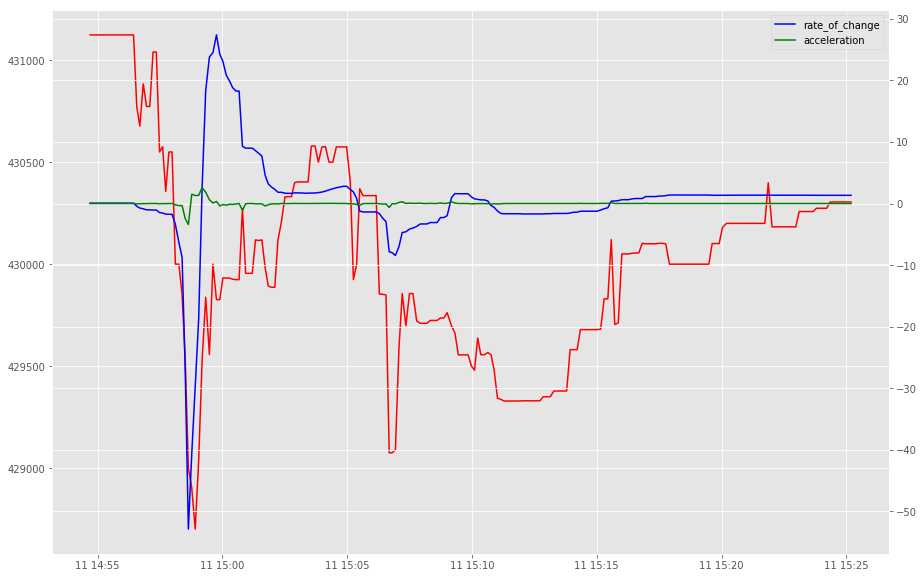

In [169]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.btc_current_price, color='r')
#ax1.plot(df.datetime, df.ask_low, color='cyan', linestyle='--')
#ax1.plot(df.datetime, df.bid_high, color='magenta', linestyle='--')
#ax2.plot(df.datetime, df.spread, color='gray')
#ax1.scatter(df.datetime, df.bid_price, color='black')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
#ax2.plot(df.datetime, df.spread_pct_change, color='yellow')
ax2.legend()
plt.show()

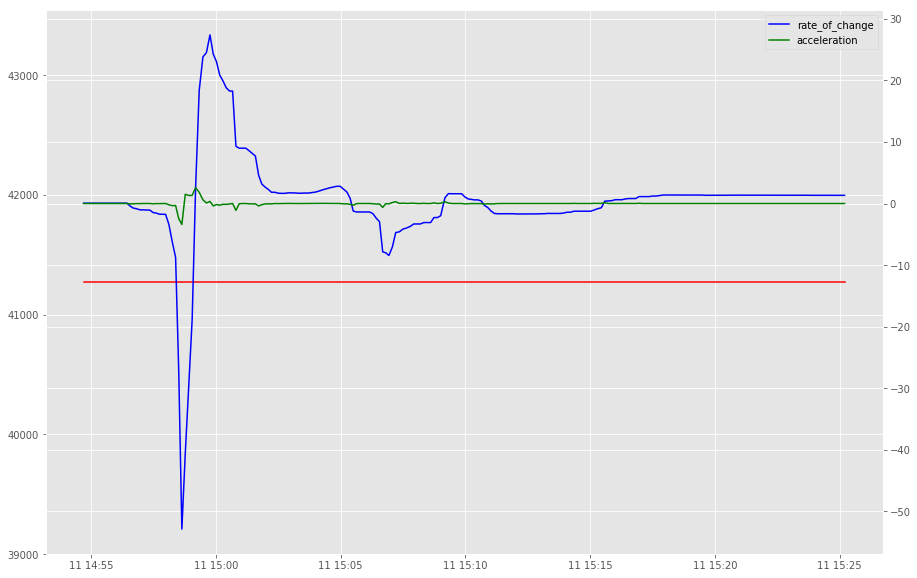

In [170]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.cash_orig, color='r')
#ax1.scatter(df.datetime, df.bid_price, color='black')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()

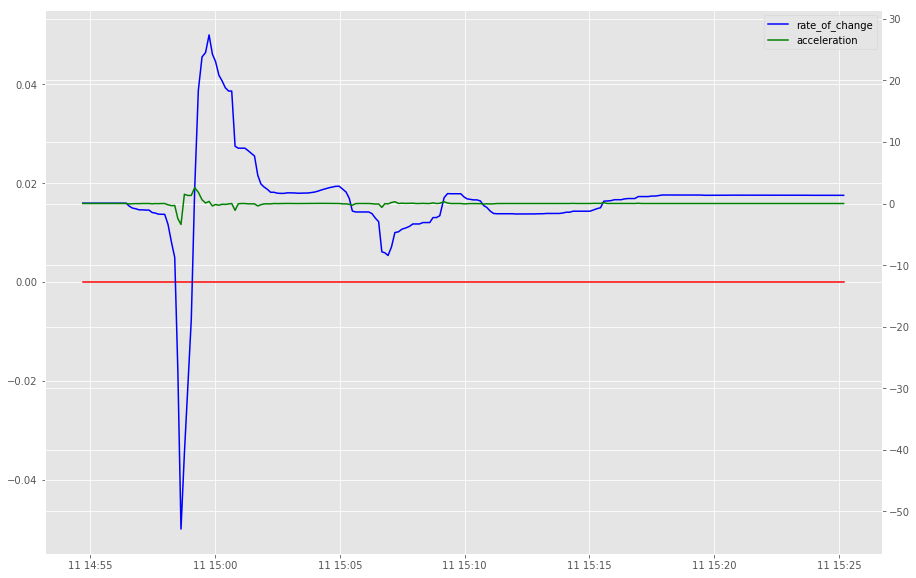

In [171]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.total_value, color='r')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()

In [172]:
df.total_value.iloc[-1] - df.total_value.iloc[0]

0

No handles with labels found to put in legend.


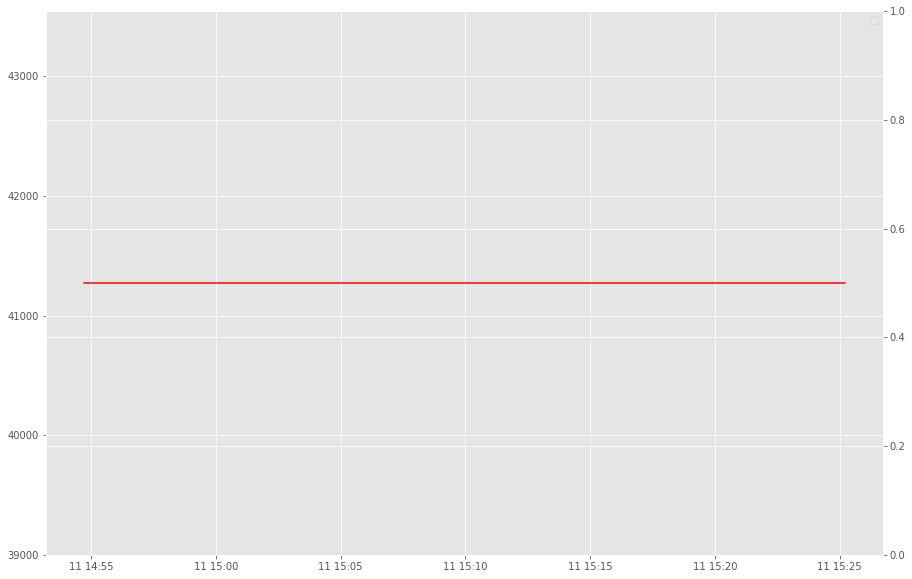

In [173]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.cash, color='r')
#ax2.plot(df.datetime, df.rate_of_change, color='b')
#ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()